In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D
import numpy as np

In [339]:
train_images = pd.read_csv('housenumbers/train_images.csv').drop('filename', axis=1).astype('float32')
train_labels = pd.read_csv('housenumbers/train_labels.csv').drop('filename', axis=1).astype('int16')

test_images = pd.read_csv('housenumbers/test_images.csv').drop('filename', axis=1).astype('float32')
test_labels = pd.read_csv('housenumbers/test_labels.csv').drop('filename', axis=1).astype('int16')

extra_images = pd.read_csv('housenumbers/extra_images.csv').drop('filename', axis=1).astype('float32')
extra_labels = pd.read_csv('housenumbers/extra_labels.csv').drop('filename', axis=1).astype('int16')

In [340]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape, extra_images.shape, extra_labels.shape

((13000, 1024), (13000, 5), (6000, 1024), (6000, 5), (13000, 1024), (13000, 5))

In [341]:
train_images.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.352349,0.366906,0.373620,0.360278,0.330929,0.309424,0.293906,0.297059,0.304902,0.312745
1,0.754941,0.726082,0.680365,0.628380,0.572475,0.520447,0.486898,0.469718,0.449831,0.429498
2,0.180714,0.192925,0.204243,0.226600,0.233271,0.227729,0.225663,0.221294,0.218545,0.215796
3,0.884024,0.884024,0.876180,0.864416,0.852651,0.833043,0.793102,0.750412,0.706549,0.675624
4,0.352416,0.351690,0.358639,0.368573,0.373008,0.392616,0.414012,0.412047,0.390263,0.397894
5,0.671937,0.669145,0.678161,0.686451,0.692675,0.693122,0.689200,0.745722,0.826902,0.838667
6,0.345863,0.345863,0.345863,0.341941,0.334545,0.328322,0.323227,0.317004,0.309161,0.305239
7,0.337051,0.347600,0.352651,0.354227,0.361792,0.371702,0.368227,0.348620,0.322063,0.306098
8,0.069988,0.078961,0.087933,0.076573,0.104961,0.176400,0.213761,0.218576,0.212353,0.196667
9,0.198686,0.189714,0.177267,0.171937,0.177200,0.194910,0.216988,0.235145,0.239961,0.259290


In [342]:
extra_images.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.857800,0.857800,0.853878,0.843733,0.848102,0.845800,0.846078,0.846525,0.847698,0.846078
1,0.300451,0.338773,0.371553,0.384278,0.404569,0.421384,0.434278,0.426435,0.391141,0.344082
2,0.263635,0.266596,0.236608,0.205769,0.195455,0.208671,0.224592,0.230282,0.253278,0.246075
3,0.347216,0.349518,0.347898,0.348624,0.347047,0.343573,0.338243,0.334769,0.324859,0.303184
4,0.235149,0.236043,0.234914,0.230949,0.229776,0.231843,0.231565,0.228816,0.235039,0.234635
5,0.081110,0.113039,0.163639,0.196251,0.207569,0.208910,0.192306,0.172016,0.160953,0.152427
6,0.065741,0.070110,0.060243,0.066298,0.123098,0.174078,0.185118,0.166125,0.118788,0.080188
7,0.389129,0.381286,0.364706,0.364259,0.376749,0.388514,0.385039,0.391027,0.384314,0.377365
8,0.459165,0.459847,0.450831,0.444565,0.443224,0.427090,0.407482,0.415773,0.457055,0.467690
9,0.404784,0.419788,0.441506,0.458129,0.440098,0.427161,0.449475,0.441098,0.444486,0.427863


In [343]:
train_labels.head()

,0,1,2,3,4
0,10,10,10,3,5
1,10,10,10,1,5
2,10,10,10,2,9
3,10,10,10,10,5
4,10,10,10,3,6


In [344]:
train_images = pd.concat([train_images, extra_images])
train_labels = pd.concat([train_labels, extra_labels])

In [345]:
num_classes = 11
img_rows, img_cols = 32, 32
epochs = 100
batch_size = 128
kernel_size = 5
depth1 = 48
depth2 = 64
depth3 = 80
depth4 = 96
depth5 = 128
depth6 = 128
kernel_size = (3,3)
pool_size=(2, 2)
pad_type = 'same'
strides = [1, 2]

Labels firs image: [10 10 10  3  5]


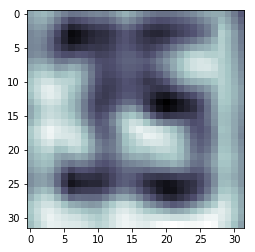

In [346]:
print("Labels firs image: {}".format(train_labels.iloc[0,:].values))
plt.imshow(train_images.iloc[0,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

Labels last image: [10 10 10  5  6]


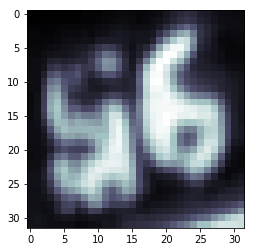

In [347]:
print("Labels last image: {}".format(train_labels.iloc[train_labels.shape[0]-1,:].values))
plt.imshow(train_images.iloc[train_labels.shape[0]-1,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

In [348]:
x_train = train_images.values.reshape(train_images.shape[0], img_rows, img_cols, 1)
x_test = test_images.values.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)
y_train = [y_train[:, i] for i in range(5)]
y_test = [y_test[:, i] for i in range(5)]

In [349]:
x_train.shape, x_test.shape

((26000, 32, 32, 1), (6000, 32, 32, 1))

In [350]:
#kaggle model
model_input = Input(shape=(32, 32, 1))
x = BatchNormalization()(model_input)
        
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = MaxPooling2D(pool_size=(2, 2))(x) 
    
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)       
x = Conv2D(64, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(128, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
              
x = Flatten()(x)
    
x = Dense(512, activation='relu')(x)    
x = Dropout(0.5)(x)
    
y1 = Dense(11, activation='softmax')(x)
y2 = Dense(11, activation='softmax')(x)
y3 = Dense(11, activation='softmax')(x)
y4 = Dense(11, activation='softmax')(x)
y5 = Dense(11, activation='softmax')(x)
    
model = Model(input=model_input, output=[y1, y2, y3, y4, y5])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
               epochs=epochs, batch_size=batch_size, verbose=1)
scores = model.evaluate(x_test, y_test, verbose=0)
print("accurracy of digits: {}".format(scores[-5:]))

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


Train on 26000 samples, validate on 6000 samples
Epoch 1/100
26000/26000 [==============================] - 5s 201us/step - loss: 6.7752 - dense_86_loss: 0.0940 - dense_87_loss: 0.3689 - dense_88_loss: 1.5712 - dense_89_loss: 2.3868 - dense_90_loss: 2.3543 - dense_86_acc: 0.9913 - dense_87_acc: 0.9357 - dense_88_acc: 0.5320 - dense_89_acc: 0.1311 - dense_90_acc: 0.1057 - val_loss: 5.0549 - val_dense_86_loss: 0.0026 - val_dense_87_loss: 0.0649 - val_dense_88_loss: 0.6045 - val_dense_89_loss: 2.0927 - val_dense_90_loss: 2.2903 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9860 - val_dense_88_acc: 0.8210 - val_dense_89_acc: 0.2097 - val_dense_90_acc: 0.1398
Epoch 2/100
26000/26000 [==============================] - 2s 93us/step - loss: 5.9885 - dense_86_loss: 0.0061 - dense_87_loss: 0.2469 - dense_88_loss: 1.2730 - dense_89_loss: 2.1620 - dense_90_loss: 2.3005 - dense_86_acc: 0.9996 - dense_87_acc: 0.9407 - dense_88_acc: 0.5882 - dense_89_acc: 0.2175 - dense_90_acc: 0.1351 - val_loss: 

26000/26000 [==============================] - 2s 92us/step - loss: 2.2079 - dense_86_loss: 0.0034 - dense_87_loss: 0.1071 - dense_88_loss: 0.5532 - dense_89_loss: 0.7302 - dense_90_loss: 0.8140 - dense_86_acc: 0.9996 - dense_87_acc: 0.9683 - dense_88_acc: 0.8227 - dense_89_acc: 0.7609 - dense_90_acc: 0.7268 - val_loss: 1.5076 - val_dense_86_loss: 0.0018 - val_dense_87_loss: 0.0343 - val_dense_88_loss: 0.2345 - val_dense_89_loss: 0.5572 - val_dense_90_loss: 0.6798 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9922 - val_dense_88_acc: 0.9302 - val_dense_89_acc: 0.8312 - val_dense_90_acc: 0.7895
Epoch 15/100
26000/26000 [==============================] - 2s 93us/step - loss: 2.1279 - dense_86_loss: 0.0030 - dense_87_loss: 0.1065 - dense_88_loss: 0.5395 - dense_89_loss: 0.6996 - dense_90_loss: 0.7792 - dense_86_acc: 0.9996 - dense_87_acc: 0.9681 - dense_88_acc: 0.8276 - dense_89_acc: 0.7708 - dense_90_acc: 0.7441 - val_loss: 1.4235 - val_dense_86_loss: 0.0022 - val_dense_87_loss: 0.034

26000/26000 [==============================] - 3s 107us/step - loss: 1.6089 - dense_86_loss: 0.0025 - dense_87_loss: 0.0845 - dense_88_loss: 0.4254 - dense_89_loss: 0.5134 - dense_90_loss: 0.5832 - dense_86_acc: 0.9996 - dense_87_acc: 0.9746 - dense_88_acc: 0.8661 - dense_89_acc: 0.8377 - dense_90_acc: 0.8131 - val_loss: 1.1415 - val_dense_86_loss: 0.0019 - val_dense_87_loss: 0.0226 - val_dense_88_loss: 0.1873 - val_dense_89_loss: 0.4292 - val_dense_90_loss: 0.5006 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9955 - val_dense_88_acc: 0.9463 - val_dense_89_acc: 0.8678 - val_dense_90_acc: 0.8440
Epoch 28/100
26000/26000 [==============================] - 3s 98us/step - loss: 1.5767 - dense_86_loss: 0.0026 - dense_87_loss: 0.0850 - dense_88_loss: 0.4154 - dense_89_loss: 0.5034 - dense_90_loss: 0.5704 - dense_86_acc: 0.9996 - dense_87_acc: 0.9748 - dense_88_acc: 0.8689 - dense_89_acc: 0.8405 - dense_90_acc: 0.8155 - val_loss: 1.1334 - val_dense_86_loss: 0.0018 - val_dense_87_loss: 0.02

26000/26000 [==============================] - 3s 117us/step - loss: 1.3639 - dense_86_loss: 0.0022 - dense_87_loss: 0.0750 - dense_88_loss: 0.3554 - dense_89_loss: 0.4390 - dense_90_loss: 0.4922 - dense_86_acc: 0.9996 - dense_87_acc: 0.9769 - dense_88_acc: 0.8880 - dense_89_acc: 0.8618 - dense_90_acc: 0.8436 - val_loss: 1.0127 - val_dense_86_loss: 0.0020 - val_dense_87_loss: 0.0211 - val_dense_88_loss: 0.1688 - val_dense_89_loss: 0.3859 - val_dense_90_loss: 0.4348 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9952 - val_dense_88_acc: 0.9533 - val_dense_89_acc: 0.8852 - val_dense_90_acc: 0.8658
Epoch 41/100
26000/26000 [==============================] - 3s 107us/step - loss: 1.3526 - dense_86_loss: 0.0026 - dense_87_loss: 0.0748 - dense_88_loss: 0.3504 - dense_89_loss: 0.4299 - dense_90_loss: 0.4949 - dense_86_acc: 0.9996 - dense_87_acc: 0.9774 - dense_88_acc: 0.8903 - dense_89_acc: 0.8648 - dense_90_acc: 0.8425 - val_loss: 0.9799 - val_dense_86_loss: 0.0017 - val_dense_87_loss: 0.0

26000/26000 [==============================] - 2s 89us/step - loss: 1.2402 - dense_86_loss: 0.0018 - dense_87_loss: 0.0690 - dense_88_loss: 0.3259 - dense_89_loss: 0.3925 - dense_90_loss: 0.4511 - dense_86_acc: 0.9996 - dense_87_acc: 0.9790 - dense_88_acc: 0.8973 - dense_89_acc: 0.8763 - dense_90_acc: 0.8571 - val_loss: 0.9916 - val_dense_86_loss: 0.0019 - val_dense_87_loss: 0.0257 - val_dense_88_loss: 0.1711 - val_dense_89_loss: 0.3708 - val_dense_90_loss: 0.4221 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9935 - val_dense_88_acc: 0.9525 - val_dense_89_acc: 0.8922 - val_dense_90_acc: 0.8687
Epoch 54/100
26000/26000 [==============================] - 3s 114us/step - loss: 1.2098 - dense_86_loss: 0.0022 - dense_87_loss: 0.0685 - dense_88_loss: 0.3173 - dense_89_loss: 0.3794 - dense_90_loss: 0.4424 - dense_86_acc: 0.9996 - dense_87_acc: 0.9789 - dense_88_acc: 0.8998 - dense_89_acc: 0.8815 - dense_90_acc: 0.8592 - val_loss: 0.9630 - val_dense_86_loss: 0.0019 - val_dense_87_loss: 0.02

26000/26000 [==============================] - 3s 99us/step - loss: 1.1221 - dense_86_loss: 0.0020 - dense_87_loss: 0.0632 - dense_88_loss: 0.2899 - dense_89_loss: 0.3565 - dense_90_loss: 0.4105 - dense_86_acc: 0.9995 - dense_87_acc: 0.9807 - dense_88_acc: 0.9084 - dense_89_acc: 0.8861 - dense_90_acc: 0.8711 - val_loss: 1.0068 - val_dense_86_loss: 0.0024 - val_dense_87_loss: 0.0252 - val_dense_88_loss: 0.1724 - val_dense_89_loss: 0.3741 - val_dense_90_loss: 0.4327 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9935 - val_dense_88_acc: 0.9502 - val_dense_89_acc: 0.8942 - val_dense_90_acc: 0.8655
Epoch 67/100
26000/26000 [==============================] - 3s 114us/step - loss: 1.1431 - dense_86_loss: 0.0022 - dense_87_loss: 0.0613 - dense_88_loss: 0.2940 - dense_89_loss: 0.3664 - dense_90_loss: 0.4192 - dense_86_acc: 0.9996 - dense_87_acc: 0.9811 - dense_88_acc: 0.9089 - dense_89_acc: 0.8846 - dense_90_acc: 0.8678 - val_loss: 0.9521 - val_dense_86_loss: 0.0023 - val_dense_87_loss: 0.02

26000/26000 [==============================] - 3s 108us/step - loss: 1.0767 - dense_86_loss: 0.0017 - dense_87_loss: 0.0631 - dense_88_loss: 0.2746 - dense_89_loss: 0.3458 - dense_90_loss: 0.3914 - dense_86_acc: 0.9996 - dense_87_acc: 0.9808 - dense_88_acc: 0.9145 - dense_89_acc: 0.8893 - dense_90_acc: 0.8752 - val_loss: 0.9549 - val_dense_86_loss: 0.0028 - val_dense_87_loss: 0.0202 - val_dense_88_loss: 0.1662 - val_dense_89_loss: 0.3694 - val_dense_90_loss: 0.3963 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9942 - val_dense_88_acc: 0.9567 - val_dense_89_acc: 0.8995 - val_dense_90_acc: 0.8753
Epoch 80/100
26000/26000 [==============================] - 3s 104us/step - loss: 1.0662 - dense_86_loss: 0.0019 - dense_87_loss: 0.0590 - dense_88_loss: 0.2690 - dense_89_loss: 0.3393 - dense_90_loss: 0.3970 - dense_86_acc: 0.9996 - dense_87_acc: 0.9820 - dense_88_acc: 0.9144 - dense_89_acc: 0.8945 - dense_90_acc: 0.8749 - val_loss: 0.9245 - val_dense_86_loss: 0.0029 - val_dense_87_loss: 0.0

26000/26000 [==============================] - 3s 106us/step - loss: 1.0177 - dense_86_loss: 0.0018 - dense_87_loss: 0.0592 - dense_88_loss: 0.2590 - dense_89_loss: 0.3223 - dense_90_loss: 0.3754 - dense_86_acc: 0.9996 - dense_87_acc: 0.9820 - dense_88_acc: 0.9201 - dense_89_acc: 0.9007 - dense_90_acc: 0.8810 - val_loss: 0.9101 - val_dense_86_loss: 0.0023 - val_dense_87_loss: 0.0217 - val_dense_88_loss: 0.1539 - val_dense_89_loss: 0.3355 - val_dense_90_loss: 0.3966 - val_dense_86_acc: 0.9998 - val_dense_87_acc: 0.9942 - val_dense_88_acc: 0.9582 - val_dense_89_acc: 0.9045 - val_dense_90_acc: 0.8798
Epoch 93/100
26000/26000 [==============================] - 3s 105us/step - loss: 1.0216 - dense_86_loss: 0.0017 - dense_87_loss: 0.0584 - dense_88_loss: 0.2534 - dense_89_loss: 0.3336 - dense_90_loss: 0.3745 - dense_86_acc: 0.9996 - dense_87_acc: 0.9820 - dense_88_acc: 0.9187 - dense_89_acc: 0.8938 - dense_90_acc: 0.8802 - val_loss: 0.9164 - val_dense_86_loss: 0.0023 - val_dense_87_loss: 0.0

In [351]:
probas = model.predict(np.array([x_test[1500]]))
classes = []
for array in probas:
    classes.append(array.argmax())
classes

[10, 10, 10, 8, 9]

Labels last test image: [10 10 10  8  9]


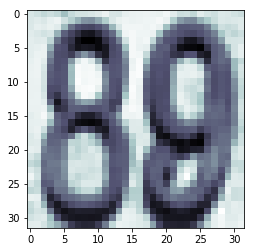

In [352]:
print("Labels last test image: {}".format(test_labels.iloc[1500,:].values))
plt.imshow(test_images.iloc[1500,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

In [353]:
#paper model
inputs = Input(shape = input_shape)

x = Conv2D(filters=depth1, kernel_size=kernel_size, padding=pad_type, name="b1_conv1")(inputs)
x = Activation('relu', name="b1_act1")(x)
x = BatchNormalization(name="b1_bnorm1")(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[1], strides[1]), name="b1_pool1")(x)
x = Dropout(0.25, name="b1_drop1")(x)

x = Conv2D(filters=depth2, kernel_size=kernel_size, padding=pad_type, name="b2_conv1")(x)
x = Activation('relu', name="b2_act1")(x)
x = BatchNormalization(name="b2_bnorm1")(x)
x = Dropout(0.25, name="b2_drop1")(x)


x = Conv2D(filters=depth3, kernel_size=kernel_size, padding=pad_type, name="b2_conv2")(x)
x = Activation('relu', name="b2_act2")(x)
x = BatchNormalization(name="b2_bnorm2")(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[0], strides[0]), name="b2_pool1")(x)
x = Dropout(0.25, name="b2_drop2")(x)

x = Conv2D(filters=depth4, kernel_size=kernel_size, padding=pad_type, name="b3_conv1")(x)
x = Activation('relu', name="b3_act1")(x)
x = BatchNormalization(name="b3_bnorm1")(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[1], strides[1]), name="b3_pool1")(x)
x = Dropout(0.25, name="b3_drop1")(x)


x = Conv2D(filters=depth5, kernel_size=kernel_size, padding=pad_type, name="b3_conv2")(x)
x = Activation('relu', name="b3_act2")(x)
x = BatchNormalization(name="b3_bnorm2")(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[0], strides[0]), name="b3_pool2")(x)
x = Dropout(0.25, name="b3_drop2")(x)

x = Conv2D(filters=depth6, kernel_size=kernel_size, padding=pad_type, name="b4_conv1")(x)
x = Activation('relu', name="b4_act1")(x)
x = BatchNormalization(name="b4_bnorm1")(x)
x = Dropout(0.5, name="b4_drop1")(x)

x = Flatten(name="feature_vector")(x)

y1 = Dense(11, activation='softmax')(x)
y2 = Dense(11, activation='softmax')(x)
y3 = Dense(11, activation='softmax')(x)
y4 = Dense(11, activation='softmax')(x)
y5 = Dense(11, activation='softmax')(x)

model = Model(input=inputs, output = [y1, y2, y3, y4, y5])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
               epochs=epochs, batch_size=batch_size, verbose=1)
scores = model.evaluate(x_test, y_test, verbose=0)
print("accurracy of digits: {}".format(scores[-5:]))

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


Train on 26000 samples, validate on 6000 samples
Epoch 1/100
26000/26000 [==============================] - 10s 388us/step - loss: 6.8748 - dense_91_loss: 0.0403 - dense_92_loss: 0.3124 - dense_93_loss: 1.4452 - dense_94_loss: 2.4413 - dense_95_loss: 2.6355 - dense_91_acc: 0.9907 - dense_92_acc: 0.9287 - dense_93_acc: 0.5845 - dense_94_acc: 0.2694 - dense_95_acc: 0.2022 - val_loss: 5.7664 - val_dense_91_loss: 0.0036 - val_dense_92_loss: 0.1039 - val_dense_93_loss: 0.8196 - val_dense_94_loss: 2.3595 - val_dense_95_loss: 2.4797 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9813 - val_dense_93_acc: 0.7357 - val_dense_94_acc: 0.3642 - val_dense_95_acc: 0.3317
Epoch 2/100
26000/26000 [==============================] - 7s 258us/step - loss: 3.8472 - dense_91_loss: 0.0069 - dense_92_loss: 0.1846 - dense_93_loss: 0.7888 - dense_94_loss: 1.3859 - dense_95_loss: 1.4810 - dense_91_acc: 0.9993 - dense_92_acc: 0.9490 - dense_93_acc: 0.7640 - dense_94_acc: 0.5815 - dense_95_acc: 0.5491 - val_loss

26000/26000 [==============================] - 7s 258us/step - loss: 0.8123 - dense_91_loss: 0.0011 - dense_92_loss: 0.0362 - dense_93_loss: 0.1865 - dense_94_loss: 0.2859 - dense_95_loss: 0.3026 - dense_91_acc: 0.9998 - dense_92_acc: 0.9888 - dense_93_acc: 0.9422 - dense_94_acc: 0.9104 - dense_95_acc: 0.9035 - val_loss: 0.8026 - val_dense_91_loss: 0.0013 - val_dense_92_loss: 0.0167 - val_dense_93_loss: 0.1387 - val_dense_94_loss: 0.3128 - val_dense_95_loss: 0.3330 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9953 - val_dense_93_acc: 0.9617 - val_dense_94_acc: 0.9180 - val_dense_95_acc: 0.9020
Epoch 15/100
26000/26000 [==============================] - 7s 256us/step - loss: 0.7747 - dense_91_loss: 7.2631e-04 - dense_92_loss: 0.0315 - dense_93_loss: 0.1818 - dense_94_loss: 0.2771 - dense_95_loss: 0.2835 - dense_91_acc: 0.9999 - dense_92_acc: 0.9901 - dense_93_acc: 0.9430 - dense_94_acc: 0.9143 - dense_95_acc: 0.9088 - val_loss: 0.7956 - val_dense_91_loss: 0.0014 - val_dense_92_loss:

26000/26000 [==============================] - 7s 257us/step - loss: 0.5253 - dense_91_loss: 4.2855e-04 - dense_92_loss: 0.0203 - dense_93_loss: 0.1128 - dense_94_loss: 0.1872 - dense_95_loss: 0.2046 - dense_91_acc: 0.9999 - dense_92_acc: 0.9932 - dense_93_acc: 0.9628 - dense_94_acc: 0.9402 - dense_95_acc: 0.9336 - val_loss: 0.7642 - val_dense_91_loss: 0.0011 - val_dense_92_loss: 0.0135 - val_dense_93_loss: 0.1290 - val_dense_94_loss: 0.2965 - val_dense_95_loss: 0.3239 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9967 - val_dense_93_acc: 0.9693 - val_dense_94_acc: 0.9240 - val_dense_95_acc: 0.9110
Epoch 28/100
26000/26000 [==============================] - 7s 257us/step - loss: 0.5545 - dense_91_loss: 5.6799e-04 - dense_92_loss: 0.0232 - dense_93_loss: 0.1162 - dense_94_loss: 0.2014 - dense_95_loss: 0.2131 - dense_91_acc: 0.9999 - dense_92_acc: 0.9921 - dense_93_acc: 0.9615 - dense_94_acc: 0.9365 - dense_95_acc: 0.9308 - val_loss: 0.7721 - val_dense_91_loss: 0.0011 - val_dense_92_l

26000/26000 [==============================] - 7s 258us/step - loss: 0.3946 - dense_91_loss: 1.9210e-04 - dense_92_loss: 0.0159 - dense_93_loss: 0.0823 - dense_94_loss: 0.1411 - dense_95_loss: 0.1551 - dense_91_acc: 1.0000 - dense_92_acc: 0.9947 - dense_93_acc: 0.9726 - dense_94_acc: 0.9525 - dense_95_acc: 0.9495 - val_loss: 0.7467 - val_dense_91_loss: 0.0012 - val_dense_92_loss: 0.0150 - val_dense_93_loss: 0.1271 - val_dense_94_loss: 0.3002 - val_dense_95_loss: 0.3032 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9970 - val_dense_93_acc: 0.9703 - val_dense_94_acc: 0.9280 - val_dense_95_acc: 0.9215
Epoch 41/100
26000/26000 [==============================] - 7s 271us/step - loss: 0.4005 - dense_91_loss: 9.6647e-05 - dense_92_loss: 0.0126 - dense_93_loss: 0.0873 - dense_94_loss: 0.1422 - dense_95_loss: 0.1584 - dense_91_acc: 1.0000 - dense_92_acc: 0.9958 - dense_93_acc: 0.9706 - dense_94_acc: 0.9535 - dense_95_acc: 0.9485 - val_loss: 0.7552 - val_dense_91_loss: 0.0012 - val_dense_92_l

26000/26000 [==============================] - 7s 260us/step - loss: 0.3428 - dense_91_loss: 2.3571e-04 - dense_92_loss: 0.0134 - dense_93_loss: 0.0707 - dense_94_loss: 0.1193 - dense_95_loss: 0.1391 - dense_91_acc: 1.0000 - dense_92_acc: 0.9959 - dense_93_acc: 0.9765 - dense_94_acc: 0.9594 - dense_95_acc: 0.9544 - val_loss: 0.7443 - val_dense_91_loss: 0.0014 - val_dense_92_loss: 0.0139 - val_dense_93_loss: 0.1328 - val_dense_94_loss: 0.3047 - val_dense_95_loss: 0.2915 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9965 - val_dense_93_acc: 0.9707 - val_dense_94_acc: 0.9332 - val_dense_95_acc: 0.9258
Epoch 54/100
26000/26000 [==============================] - 7s 265us/step - loss: 0.3297 - dense_91_loss: 2.2941e-04 - dense_92_loss: 0.0114 - dense_93_loss: 0.0674 - dense_94_loss: 0.1175 - dense_95_loss: 0.1331 - dense_91_acc: 1.0000 - dense_92_acc: 0.9958 - dense_93_acc: 0.9777 - dense_94_acc: 0.9612 - dense_95_acc: 0.9561 - val_loss: 0.7824 - val_dense_91_loss: 0.0015 - val_dense_92_l

26000/26000 [==============================] - 6s 247us/step - loss: 0.2724 - dense_91_loss: 4.0280e-05 - dense_92_loss: 0.0070 - dense_93_loss: 0.0576 - dense_94_loss: 0.1000 - dense_95_loss: 0.1077 - dense_91_acc: 1.0000 - dense_92_acc: 0.9973 - dense_93_acc: 0.9804 - dense_94_acc: 0.9665 - dense_95_acc: 0.9640 - val_loss: 0.7848 - val_dense_91_loss: 0.0016 - val_dense_92_loss: 0.0143 - val_dense_93_loss: 0.1395 - val_dense_94_loss: 0.3117 - val_dense_95_loss: 0.3177 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9965 - val_dense_93_acc: 0.9652 - val_dense_94_acc: 0.9262 - val_dense_95_acc: 0.9202
Epoch 67/100
26000/26000 [==============================] - 7s 253us/step - loss: 0.2583 - dense_91_loss: 3.9769e-04 - dense_92_loss: 0.0083 - dense_93_loss: 0.0536 - dense_94_loss: 0.0914 - dense_95_loss: 0.1046 - dense_91_acc: 0.9998 - dense_92_acc: 0.9972 - dense_93_acc: 0.9814 - dense_94_acc: 0.9682 - dense_95_acc: 0.9654 - val_loss: 0.7124 - val_dense_91_loss: 0.0013 - val_dense_92_l

26000/26000 [==============================] - 7s 267us/step - loss: 0.2380 - dense_91_loss: 5.5850e-05 - dense_92_loss: 0.0082 - dense_93_loss: 0.0493 - dense_94_loss: 0.0857 - dense_95_loss: 0.0949 - dense_91_acc: 1.0000 - dense_92_acc: 0.9976 - dense_93_acc: 0.9834 - dense_94_acc: 0.9715 - dense_95_acc: 0.9685 - val_loss: 0.7705 - val_dense_91_loss: 0.0017 - val_dense_92_loss: 0.0145 - val_dense_93_loss: 0.1393 - val_dense_94_loss: 0.3096 - val_dense_95_loss: 0.3054 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9970 - val_dense_93_acc: 0.9718 - val_dense_94_acc: 0.9345 - val_dense_95_acc: 0.9268
Epoch 80/100
26000/26000 [==============================] - 7s 255us/step - loss: 0.2344 - dense_91_loss: 1.1980e-04 - dense_92_loss: 0.0078 - dense_93_loss: 0.0520 - dense_94_loss: 0.0819 - dense_95_loss: 0.0926 - dense_91_acc: 1.0000 - dense_92_acc: 0.9976 - dense_93_acc: 0.9813 - dense_94_acc: 0.9713 - dense_95_acc: 0.9688 - val_loss: 0.7985 - val_dense_91_loss: 0.0017 - val_dense_92_l

26000/26000 [==============================] - 7s 271us/step - loss: 0.2332 - dense_91_loss: 5.1628e-05 - dense_92_loss: 0.0092 - dense_93_loss: 0.0469 - dense_94_loss: 0.0846 - dense_95_loss: 0.0923 - dense_91_acc: 1.0000 - dense_92_acc: 0.9967 - dense_93_acc: 0.9837 - dense_94_acc: 0.9718 - dense_95_acc: 0.9682 - val_loss: 0.7772 - val_dense_91_loss: 0.0016 - val_dense_92_loss: 0.0147 - val_dense_93_loss: 0.1451 - val_dense_94_loss: 0.3075 - val_dense_95_loss: 0.3083 - val_dense_91_acc: 0.9998 - val_dense_92_acc: 0.9963 - val_dense_93_acc: 0.9717 - val_dense_94_acc: 0.9353 - val_dense_95_acc: 0.9295
Epoch 93/100
26000/26000 [==============================] - 7s 263us/step - loss: 0.2079 - dense_91_loss: 5.4463e-04 - dense_92_loss: 0.0081 - dense_93_loss: 0.0430 - dense_94_loss: 0.0713 - dense_95_loss: 0.0850 - dense_91_acc: 0.9998 - dense_92_acc: 0.9973 - dense_93_acc: 0.9855 - dense_94_acc: 0.9748 - dense_95_acc: 0.9708 - val_loss: 0.8816 - val_dense_91_loss: 0.0019 - val_dense_92_l